# Lab 2 - EC9630 : MACHINE LEARNING

# VISHWAJITH A.G.N.

# 2019/E/156

# SEMESTER 06

# 17 MAY 2023 

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#1. Load the protein tertiary structure dataset from UCI data repository
dataset = pd.read_csv('CASP.csv')

In [55]:
#2. Study the dataset
print (dataset.head())
print (dataset.shape)
print (dataset.describe())

     RMSD        F1       F2       F3        F4            F5        F6  \
0  17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1   6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2   9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3  15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4   7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   

        F7   F8       F9  
0  4287.87  102  27.0302  
1  3328.91   39  38.5468  
2  2981.04   29  38.8119  
3  3248.22   70  39.0651  
4  2814.42   41  39.9147  
(45730, 10)
               RMSD            F1            F2            F3            F4  \
count  45730.000000  45730.000000  45730.000000  45730.000000  45730.000000   
mean       7.748528   9871.596995   3017.367175      0.302392    103.492433   
std        6.118312   4058.138034   1464.324663      0.062886     55.424985   
min        0.000000   2392.050000    403.500000      0.0925

In [56]:
# 3. Divide the dataset into train and test set.
X = dataset.drop('RMSD', axis=1)  #in here first column 'RMSD' as the target variable
y = dataset['RMSD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# 4.Build a linear regression model on the train data.
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# 5. Evaluate your model on the test data
linear_predictions = linear_model.predict(X_test)

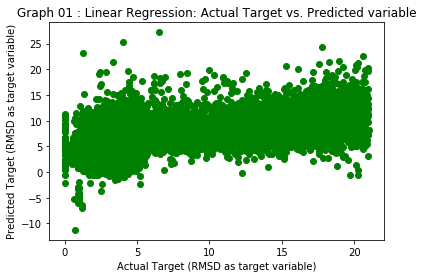

In [61]:
# 6. Plot your test target data against the predicted data
plt.scatter(y_test, linear_predictions, color = 'green')
plt.title('Graph 01 : Linear Regression: Actual Target vs. Predicted variable')
plt.xlabel('Actual Target (RMSD as target variable)')
plt.ylabel('Predicted Target (RMSD as target variable)')
plt.show()

#for compariosson between 2 methods in part 9
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

In [44]:
# 7. Now use the random forest regressor to build a regression model.
rf_model = RandomForestRegressor(n_estimators=10)
rf_model.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

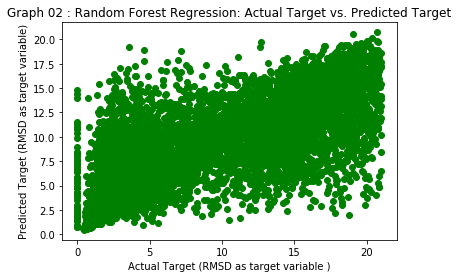

In [62]:
# 8.  Evaluate the model on test data and plot the predicted value as above
rf_predictions = rf_model.predict(X_test)
plt.scatter(y_test, rf_predictions, color = 'green')
plt.title('Graph 02 : Random Forest Regression: Actual Target vs. Predicted Target')
plt.xlabel('Actual Target (RMSD as target variable )')
plt.ylabel('Predicted Target (RMSD as target variable)')
plt.show()

#for compariosson between 2 methods in part 9
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)


In [53]:
# 9. Compare the results by different regression methods. 
print('Linear Regression Metrics = ')
print('Mean Squared Error = ', linear_mse)
print('R2 Score = ', linear_r2)
print('\nRandom Forest Regression Metrics = ')
print('Mean Squared Error = ', rf_mse)
print('R2 Score = ', rf_r2)

Linear Regression Metrics = 
Mean Squared Error =  27.46102520966434
R2 Score =  0.2702878661920588

Random Forest Regression Metrics = 
Mean Squared Error =  14.02684885331938
R2 Score =  0.6272694945214585


In [51]:
#The random forest regression model has a lower mean squared error than Linear Regression matrics. A lower mean squared error means the better performances. That means the random forest regression model has lower prediction errors on average.
# The random forest regression model has a higher R2 score than linear regression model. According to the R2 scores random forest regression model express more of the variance in the target variable.
# According to the both comparisons we can say that Random Forest regression model is better.